In [1]:
import sys
sys.path.append('../')
import torch
import torch.nn.functional as F
import torch.nn as nn

In [2]:
from Unet_spandan_implementation import UNet

# Loading model file

In [3]:
unet_model = UNet(num_classes=21)

initializing unet spandan


# Architecture from paper

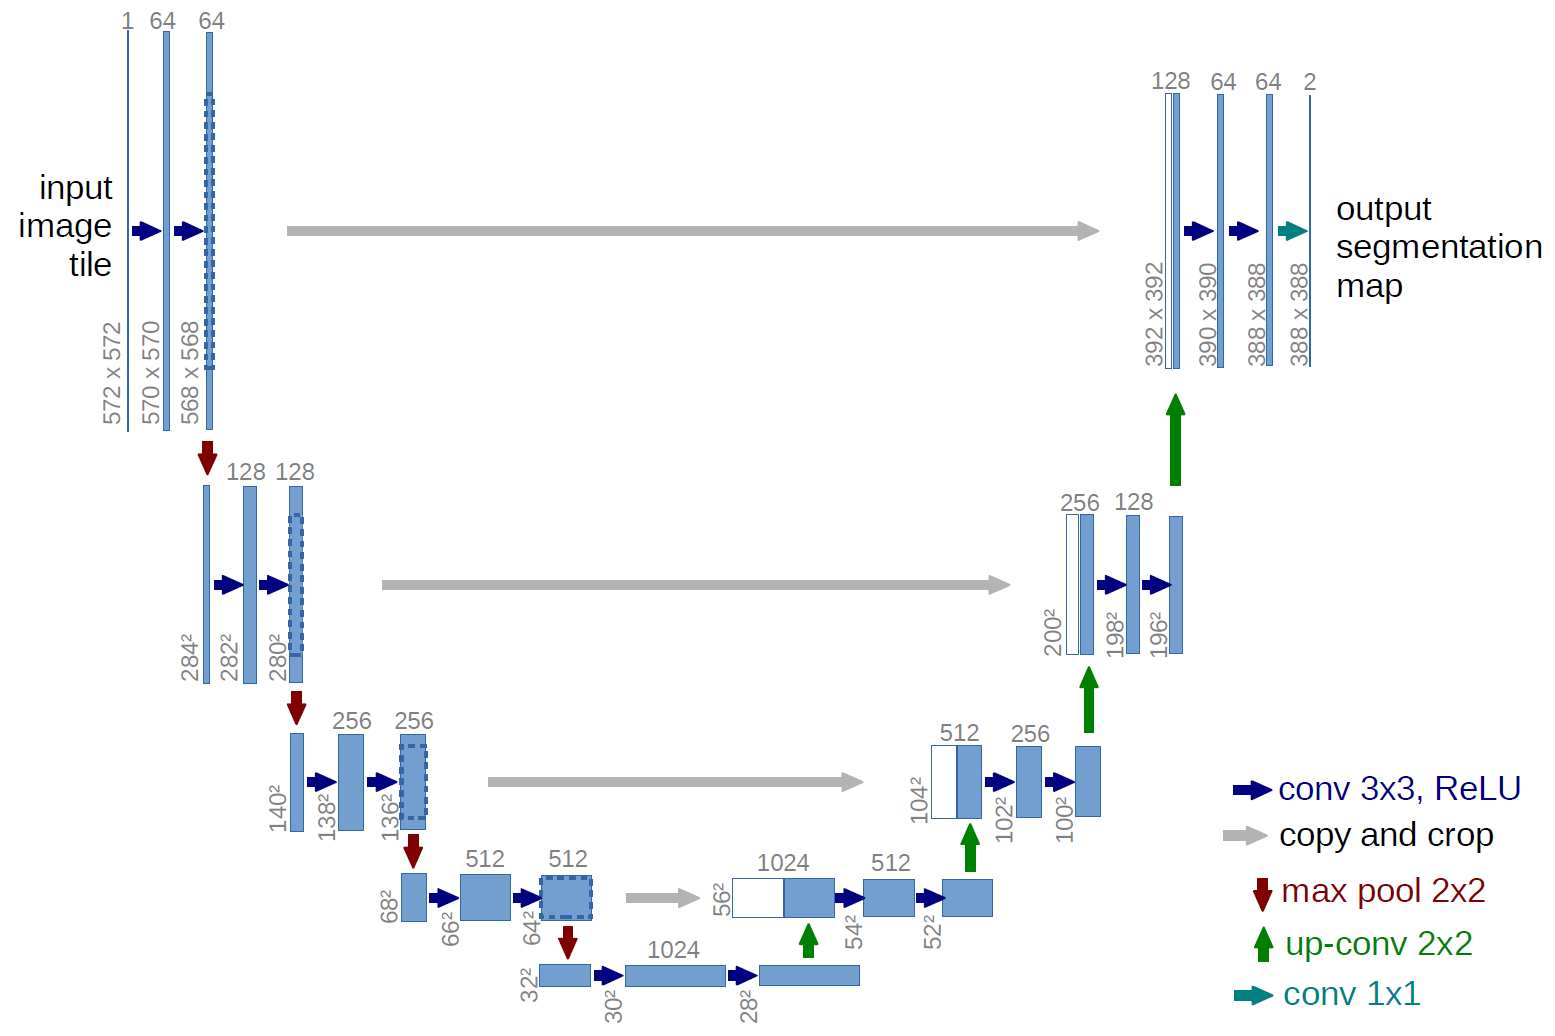

# Loaded architecture

In [4]:
unet_model.cuda()

UNet(
  (down1): UnetEncoder(
    (layer): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU()
    )
  )
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=True)
  (down2): UnetEncoder(
    (layer): Sequential(
      (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU()
    )
  )
  (pool2): MaxPool2d(kernel_size=2, stride=

In [5]:
# img_input_path = plt.imshow()

In [6]:
random_input = torch.rand((5,3,224,224)).cuda()

In [7]:
total_out = unet_model(random_input)

In [8]:
total_out.shape

torch.Size([5, 21, 224, 224])

In [15]:
torch.sum(total_out[0,:,100,102])

tensor(1.0000, device='cuda:0', grad_fn=<SumBackward0>)

Above sums to one means sum of probability of all classes is 1.

# Checking Part by Part

In [8]:
down_1_out = unet_model.down1(random_input)

In [9]:
down_1_out.shape

torch.Size([5, 64, 224, 224])

In [10]:
block_1_out = unet_model.pool1(down_1_out)

In [11]:
block_1_out.shape

torch.Size([5, 64, 112, 112])

In [12]:
down_2_out = unet_model.down2(block_1_out)

In [13]:
down_2_out.shape

torch.Size([5, 128, 112, 112])

In [14]:
block_2_out = unet_model.pool2(down_2_out)

In [15]:
block_2_out.shape

torch.Size([5, 128, 56, 56])

In [16]:
down_3_out = unet_model.down3(block_2_out)

In [17]:
down_3_out.shape

torch.Size([5, 256, 56, 56])

In [18]:
block_3_out = unet_model.pool3(down_3_out)

In [19]:
block_3_out.shape

torch.Size([5, 256, 28, 28])

In [20]:
down_4_out = unet_model.down4(block_3_out)

In [21]:
down_4_out.shape

torch.Size([5, 512, 28, 28])

In [22]:
block_4_out = unet_model.pool4(down_4_out)

In [23]:
block_4_out.shape

torch.Size([5, 512, 14, 14])

In [24]:
center_right = unet_model.center(block_4_out)

In [25]:
center_right.shape

torch.Size([5, 512, 28, 28])

In [26]:
center_right.size()[2:]

torch.Size([28, 28])

In [33]:
center_left = down_4_out

In [34]:
concat_1 = torch.cat([center_left,center_right],1)

In [35]:
concat_1.shape

torch.Size([5, 1024, 28, 28])

In [36]:
up_1_out = unet_model.up1(concat_1)

In [37]:
up_1_out.shape

torch.Size([5, 256, 56, 56])

In [38]:
up_1_right = up_1_out
up_1_left = down_3_out

In [39]:
concat_2 = torch.cat([up_1_left,up_1_right],1)

In [40]:
concat_2.shape

torch.Size([5, 512, 56, 56])

In [41]:
up_2_out = unet_model.up2(concat_2)

In [42]:
up_2_out.shape

torch.Size([5, 128, 112, 112])

In [43]:
up_2_right = up_2_out
up_2_left = down_2_out

In [44]:
concat_3 = torch.cat([up_2_left,up_2_right],1)

In [45]:
concat_3.shape

torch.Size([5, 256, 112, 112])

In [46]:
up_3_out = unet_model.up3(concat_3)

In [47]:
up_3_out.shape

torch.Size([5, 64, 224, 224])

In [48]:
up_3_right = up_3_out
up_3_left = down_1_out

In [49]:
concat_4 = torch.cat([up_3_left,up_3_right],1)

In [50]:
up_4_out = unet_model.up4(concat_4)

In [51]:
up_4_out.shape

torch.Size([5, 64, 224, 224])

In [52]:
final_map = unet_model.output(up_4_out)

In [53]:
final_map.shape

torch.Size([5, 21, 224, 224])

In [54]:
normalizing_layer= nn.Softmax(1)

In [55]:
normalized_map = normalizing_layer(final_map)

In [56]:
torch.sum(normalized_map[0,:,13,17])

tensor(1.0000, device='cuda:0', grad_fn=<SumBackward0>)

In [57]:
normalized_map[0,:,13,17]

tensor([0.0786, 0.0192, 0.0637, 0.0371, 0.0407, 0.0345, 0.0525, 0.0425, 0.0412,
        0.0510, 0.0378, 0.0371, 0.0398, 0.0351, 0.0405, 0.0897, 0.1023, 0.0446,
        0.0348, 0.0314, 0.0461], device='cuda:0', grad_fn=<SelectBackward>)

In [58]:
normalized_map[0,:,11,11]

tensor([0.0733, 0.0251, 0.0576, 0.0485, 0.0550, 0.0395, 0.0528, 0.0555, 0.0428,
        0.0609, 0.0451, 0.0393, 0.0359, 0.0386, 0.0334, 0.0527, 0.0682, 0.0479,
        0.0283, 0.0412, 0.0585], device='cuda:0', grad_fn=<SelectBackward>)

In [59]:
torch.sum(final_map[0,:,0,0])

tensor(1.5120, device='cuda:0', grad_fn=<SumBackward0>)

In [62]:
# en4 = self.down4(po3)
#         po4 = self.pool4(en4)

#         c1 = self.center(po4)

#         dec1 = self.up1(torch.cat([c1, F.upsample_bilinear(en4, c1.size()[2:])], 1))

In [6]:
import smtplib, ssl

port = 465  # For SSL
smtp_server = "smtp.gmail.com"
sender_email = "picklefiles.smadan@gmail.com"  # Enter your address
receiver_email = "6176822589@txt.att.net"  # Enter receiver address
password = 'Puppets123!'
message = """\
Subject: Hi there

This message is sent from Python."""

context = ssl.create_default_context()
with smtplib.SMTP_SSL(smtp_server, port, context=context) as server:
    server.login(sender_email, password)
    server.sendmail(sender_email, receiver_email, message)

SMTPAuthenticationError: (535, b'5.7.8 Username and Password not accepted. Learn more at\n5.7.8  https://support.google.com/mail/?p=BadCredentials t3sm9215454qtc.8 - gsmtp')

In [7]:
sender_email

'picklefiles.smadan@gmail.com'

In [8]:
password

'Puppets123!'

In [10]:
with smtplib.SMTP_SSL(smtp_server, port, context=context) as server:
    server.login(sender_email, password)

SMTPAuthenticationError: (535, b'5.7.8 Username and Password not accepted. Learn more at\n5.7.8  https://support.google.com/mail/?p=BadCredentials t73sm1554861qke.71 - gsmtp')

In [ ]:
# Python code to illustrate Sending mail from 
# your Gmail account 
import smtplib 

# creates SMTP session 
s = smtplib.SMTP('smtp.gmail.com', 587) 

# start TLS for security 
s.starttls() 

# Authentication 
s.login("picklefiles.smadan@gmail.com", "Puppets123!") 

# message to be sent 
message = "Message_you_need_to_send"

# sending the mail 
s.sendmail("picklefiles.smadan@gmail.com", "6176822589@txt.att.net", message) 

# terminating the session 
s.quit() 